# Exploring San Francisco Bike Rental Dataset
## by Deepak Nandipati

## Preliminary Wrangling

> This dataset is of 2017 San Fransico and Bay area FordGoBike rentals. It consists of over 500,000 data points with variables such as the latitude, longitudes of data, timings of rentals, customers gender and user type. In my analysis, I would like to determine which group of riders are likely to have the longest rental duration and to also find out the timeperiod in which these riders are most active.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("2017-fordgobike-tripdata.csv") #importing data set

<br>

### Assess the Data

In [4]:
print(df.shape), 
df.info(); #assess the data

(519700, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [7]:
print(df.start_station_id.nunique()), #unique 272 stations
print(df.end_station_id.nunique()), #unique 272 stations
print(df.bike_id.nunique()), #3673 bikes present in San Franciso Bay Area
print(df.shape) #dataset is only 518,700 rows of bike travel information

272
272
3673
(519700, 15)


In [8]:
df.isnull().sum() #birth year and gender have null values

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

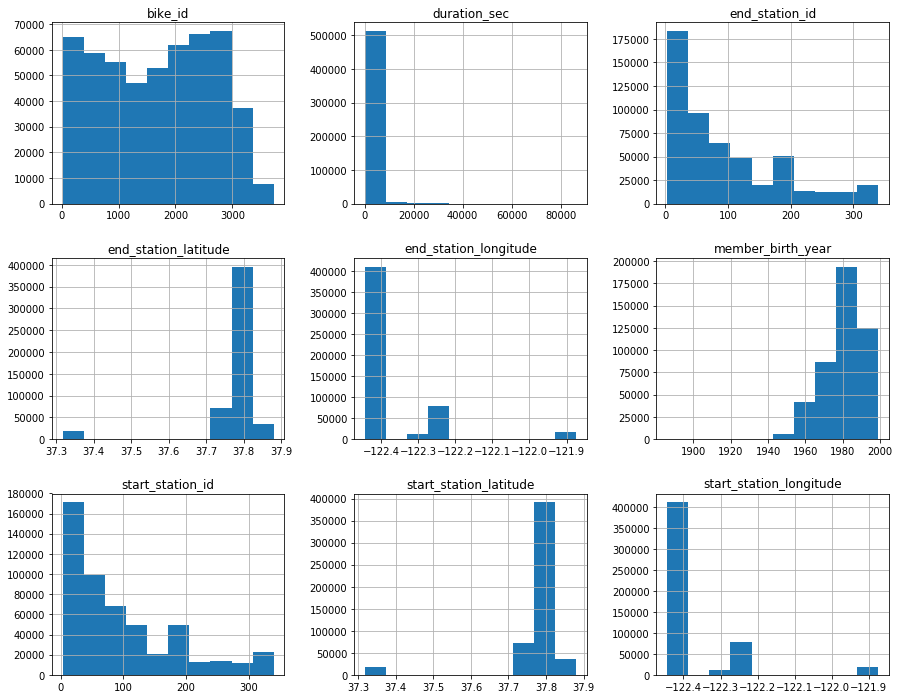

In [9]:
df.hist(figsize=(15,12));

###  Initial Quality issues:

- First thing I noticed was that the start_time and end_time are string objects, need to convert them to datetime. 
- Duration_sec needs to be converted to minutes for easier reading 
- 'user_type' and 'member_gender' need to be converted to a categorical data type 
- Null values are present in Gender column and for Birth year column; Need to fix this issue
- Fix member_birth_year -> outlier present in data, need to remove outliers as needed
- Add new column for riders age for easier reading
- Start and end time can be segregated in sections of week, month and year 
- Duration_sec looks like it has outliers as it is skewed to the right. Verify and fix the issue

### Data Cleaning

In [10]:
df_bike = df.copy() #copy to new dataframe and make changes so original dataframe is not effected

**Define** <br>
Creating a new column for members age mentioned in the 'Initial Quality issues'

**Code** <br>

In [11]:
#as the dataset is from 2017, we need to deduce riders age at that time
df_bike['rider_age'] = 2017-df_bike['member_birth_year'] 

**Test** <br>

In [12]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,rider_age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,30.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,52.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,20.0


**Define** <br>
Removing the outliers from the rider_age dataset

**Code** <br>

In [13]:
df_bike.rider_age.describe() #max of 131, a rider with an age of 131 seems unlinkely

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
25%          29.000000
50%          34.000000
75%          43.000000
max         131.000000
Name: rider_age, dtype: float64

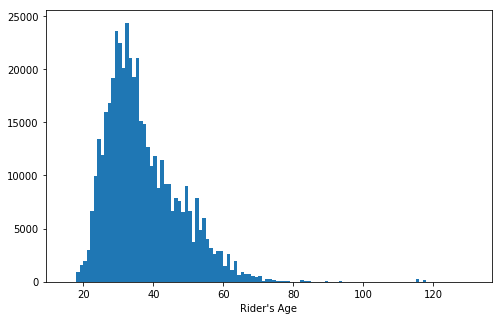

In [14]:
# lets take a look at the age distribution
binsize = 1
bins = np.arange(15, df_bike['rider_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'rider_age', bins = bins)
plt.xlabel("Rider's Age")
plt.show()

Graph is skewed to the right, and seems to have outliers that extend past 100 age mark. This seems very unlikely, but we must verify with data before removing these datasets

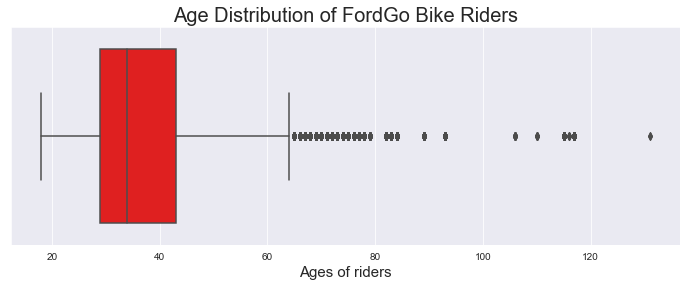

In [15]:
#another graph to determine outliers
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))

sns.boxplot(x='rider_age', data=df_bike, color='red')

#Labelling the plot 
plt.title("Age Distribution of FordGo Bike Riders", fontsize=20)
plt.xlabel("Ages of riders", fontsize=15)
plt.savefig('boxofwhisk_agedist.png');
plt.show()

In [17]:
#Estimating from graph and checking for outliers past the 80 year mark 
old_age_outliers = (df_bike['rider_age'] > 80)

print(old_age_outliers.sum());
df_bike.loc[old_age_outliers,:][:10] #displaying first 10 instead of 1687 datasets

688


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,rider_age
287,581,2017-12-31 18:10:46.5560,2017-12-31 18:20:28.3520,274,Oregon St at Adeline St,37.857567,-122.267558,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,3050,Subscriber,1900.0,Male,117.0
1751,370,2017-12-30 17:17:54.9690,2017-12-30 17:24:05.4810,207,Broadway at Coronado Ave,37.835788,-122.251621,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,456,Subscriber,1900.0,Male,117.0
3119,457,2017-12-29 18:24:08.7220,2017-12-29 18:31:46.0080,207,Broadway at Coronado Ave,37.835788,-122.251621,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,1238,Subscriber,1900.0,Male,117.0
3259,613,2017-12-29 17:20:22.0960,2017-12-29 17:30:35.5270,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,207,Broadway at Coronado Ave,37.835788,-122.251621,1238,Subscriber,1900.0,Male,117.0
5246,271,2017-12-28 16:48:41.3100,2017-12-28 16:53:12.6450,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,173,Subscriber,1900.0,Male,117.0
7183,656,2017-12-27 16:37:47.8630,2017-12-27 16:48:44.3070,19,Post St at Kearny St,37.788975,-122.403452,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3646,Subscriber,1902.0,Male,115.0
8077,501,2017-12-27 09:10:01.2100,2017-12-27 09:18:22.3530,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3672,Subscriber,1902.0,Male,115.0
9838,571,2017-12-25 22:03:23.3280,2017-12-25 22:12:54.9590,176,MacArthur BART Station,37.828410,-122.266315,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,2507,Subscriber,1900.0,Male,117.0
10712,505,2017-12-24 17:05:39.4820,2017-12-24 17:14:05.1870,274,Oregon St at Adeline St,37.857567,-122.267558,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,1551,Subscriber,1900.0,Male,117.0
13035,402,2017-12-22 15:26:22.8050,2017-12-22 15:33:05.7660,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,176,MacArthur BART Station,37.828410,-122.266315,887,Subscriber,1900.0,Male,117.0


Removing outliers of riders age in order to make it more realistic and fit to the relativity of data

In [18]:
print(df_bike.rider_age.mean())
print(df_bike.rider_age.median())

36.595212717831934
34.0


In [19]:
#instead of eyeballing from graph, lets look at percentiles
df_bike.rider_age.describe(percentiles = [.75, .8, .9, .95, .99])

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
50%          34.000000
75%          43.000000
80%          45.000000
90%          52.000000
95%          56.000000
99%          66.000000
max         131.000000
Name: rider_age, dtype: float64

99th percentile shows that most of the data falls below age 66; we will make the dataset below 66 and in process this will eliminate any given outliers of data

In [20]:
df_bike.query('rider_age > 66').count() #only 3925 outliers; we can drop this dataset

duration_sec               3925
start_time                 3925
end_time                   3925
start_station_id           3925
start_station_name         3925
start_station_latitude     3925
start_station_longitude    3925
end_station_id             3925
end_station_name           3925
end_station_latitude       3925
end_station_longitude      3925
bike_id                    3925
user_type                  3925
member_birth_year          3925
member_gender              3925
rider_age                  3925
dtype: int64

In [21]:
df_bike = df_bike.query('rider_age <= 66') #only keeping data for riders below age 66

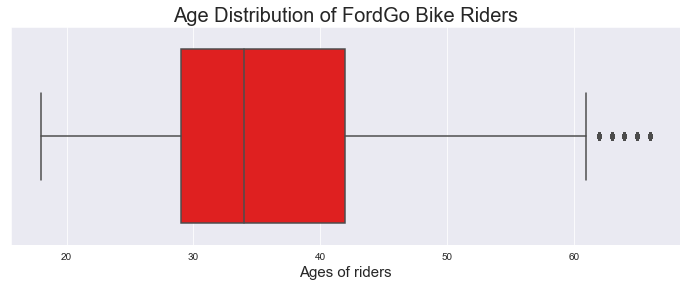

In [22]:
#notice the outliers being greatly reduced

sns.set_style("darkgrid")
plt.figure(figsize=(12,4))

sns.boxplot(x='rider_age', data=df_bike, color='red')

#Labelling the plot 
plt.title("Age Distribution of FordGo Bike Riders", fontsize=20)
plt.xlabel("Ages of riders", fontsize=15)
plt.savefig('boxofwhisk_agedist.png');

**Test** <br>

In [23]:
df_bike.rider_age.sort_values(ascending=False) #oldest age is 66, just as expected

508077    66.0
331060    66.0
90885     66.0
513210    66.0
494595    66.0
347444    66.0
234459    66.0
22303     66.0
354972    66.0
193980    66.0
55450     66.0
336378    66.0
185698    66.0
328510    66.0
258348    66.0
41835     66.0
266465    66.0
341006    66.0
282728    66.0
102376    66.0
118329    66.0
156265    66.0
210329    66.0
102454    66.0
236353    66.0
515392    66.0
303155    66.0
116123    66.0
262771    66.0
234431    66.0
          ... 
271970    18.0
517958    18.0
143679    18.0
52847     18.0
257538    18.0
257530    18.0
387064    18.0
17611     18.0
28262     18.0
494079    18.0
342991    18.0
87606     18.0
477425    18.0
66140     18.0
121589    18.0
494860    18.0
494853    18.0
361530    18.0
244835    18.0
17230     18.0
424868    18.0
3443      18.0
361757    18.0
62534     18.0
378522    18.0
53184     18.0
94975     18.0
79359     18.0
387194    18.0
459805    18.0
Name: rider_age, Length: 449234, dtype: float64

**Define** <br>
Duration of trip from seconds to minutes

**Code**

In [24]:
df_bike['duration_sec'] = df_bike['duration_sec'].apply(lambda x: (x/60))

In [25]:
df_bike.rename(columns={"duration_sec": "duration_min"}, inplace=True)

**Test**

In [26]:
print(df_bike.info()); df_bike.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449234 entries, 0 to 519699
Data columns (total 16 columns):
duration_min               449234 non-null float64
start_time                 449234 non-null object
end_time                   449234 non-null object
start_station_id           449234 non-null int64
start_station_name         449234 non-null object
start_station_latitude     449234 non-null float64
start_station_longitude    449234 non-null float64
end_station_id             449234 non-null int64
end_station_name           449234 non-null object
end_station_latitude       449234 non-null float64
end_station_longitude      449234 non-null float64
bike_id                    449234 non-null int64
user_type                  449234 non-null object
member_birth_year          449234 non-null float64
member_gender              449234 non-null object
rider_age                  449234 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 58.3+ MB
None


,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,rider_age
0,1335.166667,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,30.0


**Define** <br>
Removing the outliers from trip durations

**Code**

In [27]:
df_bike.duration_min.describe()

count    449234.000000
mean         13.881129
std          42.081107
min           1.016667
25%           6.066667
50%           9.266667
75%          13.966667
max        1437.533333
Name: duration_min, dtype: float64

max of 1437 with mean of 13 certainly indicates that there are outliers in this dataset; lets visualize this

Text(0.5, 0, 'Duration')

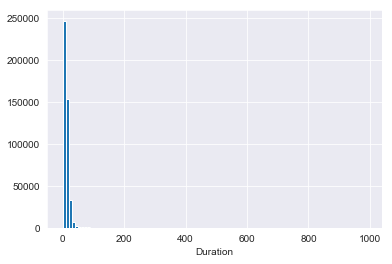

In [28]:
#utilizing graphing tool to determine any outliers

bins = np.arange(0, 1000,10)

plt.hist(data = df_bike, x = 'duration_min', bins = bins)

plt.xlabel('Duration')

Graph looks to be skewed right and has x values extending far right. This dataset does not look right, need to identify via percentiles for any strange data

In [29]:
#instead of eyeballing from graph, lets look at percentiles
df_bike.duration_min.describe(percentiles = [.75, .8, .9, .95, .99])

count    449234.000000
mean         13.881129
std          42.081107
min           1.016667
50%           9.266667
75%          13.966667
80%          15.516667
90%          20.716667
95%          26.666667
99%          74.922333
max        1437.533333
Name: duration_min, dtype: float64

In [30]:
df_bike.query('duration_min > 75').count()['duration_min']

4488

99th percentile indicates that only 1 percentile of the data falls out of the norm and 4,488 rows of data need to be removed in order to keep the dataset consistent. 

In [31]:
df_bike = df_bike.query('duration_min <= 75') #same as before; deleting outlier rows

**Test**

In [32]:
df_bike.info(); df_bike.isnull().sum()#looks good and aslo null values have also been rectified by this deletion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444746 entries, 12 to 519699
Data columns (total 16 columns):
duration_min               444746 non-null float64
start_time                 444746 non-null object
end_time                   444746 non-null object
start_station_id           444746 non-null int64
start_station_name         444746 non-null object
start_station_latitude     444746 non-null float64
start_station_longitude    444746 non-null float64
end_station_id             444746 non-null int64
end_station_name           444746 non-null object
end_station_latitude       444746 non-null float64
end_station_longitude      444746 non-null float64
bike_id                    444746 non-null int64
user_type                  444746 non-null object
member_birth_year          444746 non-null float64
member_gender              444746 non-null object
rider_age                  444746 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 57.7+ MB


duration_min               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
rider_age                  0
dtype: int64

**Define** <br>
Rider age will be grouped together in order to analyze data better

**Code**

In [33]:
df_bike['member_age_groups'] = df_bike['rider_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else x) #using apply function to create 

**Test** <br>

In [34]:
df_bike.member_age_groups.value_counts() #majority of the age groups is between 30-40, followed by 20-30

30 - 40    169558
20 - 30    141469
40 - 50     82252
50 - 60     39323
60 - 70      7902
10 - 20      4242
Name: member_age_groups, dtype: int64

In [35]:
df_bike.head(5) #verifying

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,rider_age,member_age_groups
12,36.383333,2017-12-31 23:52:55.5810,2018-01-01 00:29:18.7430,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,27.0,20 - 30
13,36.166667,2017-12-31 23:52:55.9370,2018-01-01 00:29:06.9240,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990.0,Male,27.0,20 - 30
15,25.733333,2017-12-31 23:53:38.9430,2018-01-01 00:19:23.0470,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,1980.0,Female,37.0,30 - 40
16,24.566667,2017-12-31 23:54:40.1460,2018-01-01 00:19:14.3510,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,1979.0,Male,38.0,30 - 40
18,25.533333,2017-12-31 23:52:49.4970,2018-01-01 00:18:21.9530,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,1988.0,Other,29.0,20 - 30


**Define** <br>
start_time and end_time need to be converted to datetime so we can extract information from data such as week, day, month

**Code**

In [36]:
df_bike.start_time.head() #we need to convert this string column to date type so we can isolate individual information

12    2017-12-31 23:52:55.5810
13    2017-12-31 23:52:55.9370
15    2017-12-31 23:53:38.9430
16    2017-12-31 23:54:40.1460
18    2017-12-31 23:52:49.4970
Name: start_time, dtype: object

In [37]:
#Converting str to date type
df_bike['start_time']= pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

Seperating Hours

In [38]:
df_bike['start_hour']=df_bike['start_time'].dt.hour

Creating "Date" column

In [39]:
df_bike['start_date']=df_bike['start_time'].dt.day

Creating a column for the day of week

In [40]:
df_bike['start_day']=df_bike['start_time'].dt.strftime('%A')

Extracting "Month" information

In [41]:
df_bike['start_month']=df_bike['start_time'].dt.strftime('%b')

References: <br>
> https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/ <br>
> http://strftime.org/

**Test**

In [42]:
print(df_bike.columns); df_bike.head()

Index(['duration_min', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'rider_age', 'member_age_groups',
       'start_hour', 'start_date', 'start_day', 'start_month'],
      dtype='object')


,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,rider_age,member_age_groups,start_hour,start_date,start_day,start_month
12,36.383333,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,2311,Subscriber,1990.0,Male,27.0,20 - 30,23,31,Sunday,Dec
13,36.166667,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,3717,Subscriber,1990.0,Male,27.0,20 - 30,23,31,Sunday,Dec
15,25.733333,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,...,558,Subscriber,1980.0,Female,37.0,30 - 40,23,31,Sunday,Dec
16,24.566667,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,...,3646,Subscriber,1979.0,Male,38.0,30 - 40,23,31,Sunday,Dec
18,25.533333,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3114,Subscriber,1988.0,Other,29.0,20 - 30,23,31,Sunday,Dec


**Define** <br>
Changing data types for data

**Code**

In [43]:
#changing ages to int dtype
df_bike['rider_age'] = df_bike['rider_age'].astype('int') #converting to int
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype('int')

In [44]:
#changing to category dtype
df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender']= df_bike['member_gender'].astype('category')
df_bike['member_age_groups'] = df_bike['member_age_groups'].astype('category')

In [45]:
# setting id's to string variable
df_bike['bike_id'] = df_bike['bike_id'].astype(str)
df_bike['start_station_id'] = df_bike['start_station_id'].astype(str)
df_bike['end_station_id'] = df_bike['end_station_id'].astype(str)


**Test**

In [46]:
print(df_bike.shape); 
print(df_bike.dtypes); #dtypes changes have been made

(444746, 21)
duration_min                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
rider_age                           int32
member_age_groups                category
start_hour                          int64
start_date                          int64
start_day                          object
start_month                        object
dtype: object


#### Exporting Clean CSV

In [47]:
# save cleaned data 
df_bike.to_csv('FordGoBike_Clean.csv', index=False)

### What is the structure of your dataset?

> The dataset contains close to 500,000 data points with original 15 columns:<br><br>
>('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year','member_gender')<br><br>
> additional 5 columns have been added to dataframe by extracting information from the time column, and for easier view of data the members_birth_year has been transformed to show just the members age. <br><br>
new columns added: ('rider_age', 'member_age_groups','start_hour', 'start_date', 'start_day', 'start_month').<br><br>
> **Categorical variables present:** ('user_type', 'member_gender')<br>
> **Time variables present:** ('start_hour', 'start_date', 'start_day', 'start_month', 'duration_min', 'start_time', 'end_time')


### What is/are the main feature(s) of interest in your dataset?

> In this dataset, I would like to determine which group of riders are likely to have the longest rentals and I am also intrigued to find out what seasons or timeperiod these riders are most active in San Francisco and Bay Area.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To support my investigation I would need to investigate further into the specificities of the group of riders, the set variables I will be looking at are gender, customer type, age ranges with duration as the independent variable. For the seasons or timeperiod riders are most active, an univaritive count plot would suffice.

## Univariate Exploration

> In this section, I will be dealing with the time variables to determine the distribution of data for days of week, months, hour of day and age ranges of data.

The main variable of interest is Duration as it is an impeding factor to determine which groups are likely to have longest rentals

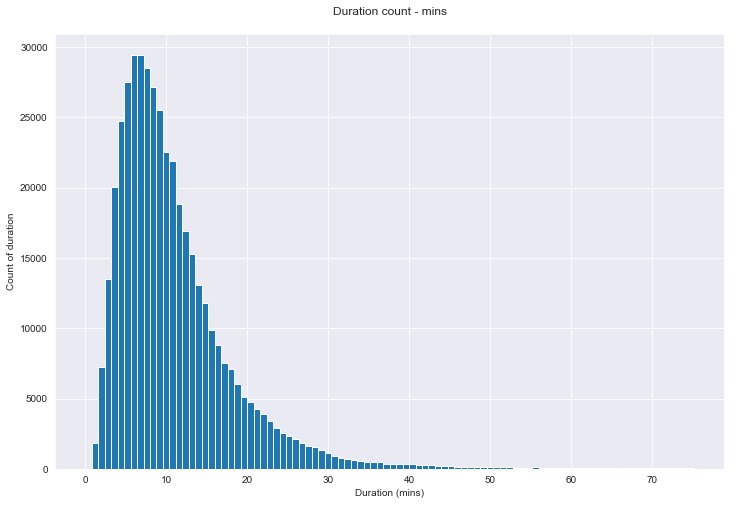

In [48]:
bin_edges = np.arange(0, 76,0.8)
plt.figure(figsize=(12,8))
plt.hist(data = df_bike, x = 'duration_min', bins = bin_edges)

plt.title("Duration count - mins", y=1.03, fontsize=12)
plt.xlabel("Duration (mins)")
plt.ylabel('Count of duration');

Graph is skewed to the right, we did remove outliers prior but for the 1 percentile so graph is yet skewed. However data is not drastically different anymore

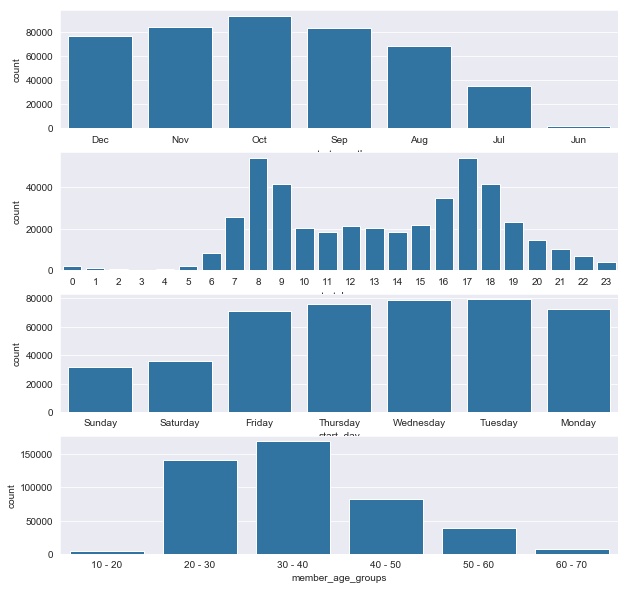

In [51]:
#all four variables to assess distribution
fig, ax = plt.subplots(nrows=4, figsize = [10,10])

default_color = sns.color_palette()[0]
sns.countplot(data = df_bike, x = 'start_month', color = default_color, ax = ax[0])
sns.countplot(data = df_bike, x = 'start_hour', color = default_color, ax = ax[1])
sns.countplot(data = df_bike, x = 'start_day', color = default_color, ax = ax[2])
sns.countplot(data = df_bike, x = 'member_age_groups', color = default_color, ax = ax[3])

plt.show()

From the graph above, looks like the 'start_hour' column has an outlier towards the left side of data; lets take a look at this and see if it should be filtered out. 

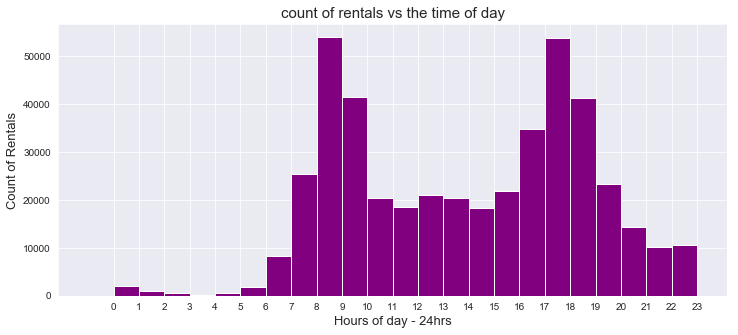

In [52]:
binsize = 1
bins = np.arange(-1, df_bike['start_hour'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_bike, x = 'start_hour', color = 'purple', bins=bins)
plt.xlabel("Hours of day - 24hrs", fontsize=13)
plt.ylabel("Count of Rentals", fontsize=13)
plt.title("count of rentals vs the time of day", fontsize=15)
plt.xticks(range(24))

plt.show()

The graph seems to follow a bimodal pattern with a surge at 8am and another surge around 5pm. These seem to be the busiest times of the day for rentals. Although there seems to be an outlier, we will keep this data as its an hour of day information and will affect the data if removed. lets look at the weekly distriubtion of bike rentals.

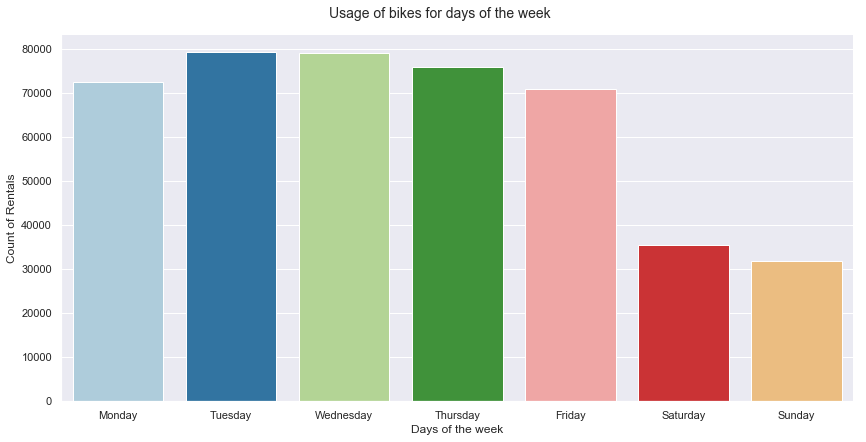

In [53]:
#Count of bike rentals from June to Dec, 2017
sns.set(font_scale=1)
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sns.catplot(data=df_bike, x='start_day', kind='count', palette="Paired", order=weekday, height=6, aspect=2)

g.set_axis_labels("Days of the week", "Count of Rentals")
g.fig.suptitle('Usage of bikes for days of the week', y=1.02, fontsize=14);

It appears that Tuesday is the busiest day for rentals followed by Wednesday and Thursday. Considering that these are weekdays, it may suggest that users are using the bikes for commuting in the city, most likely for work as the rental peaks are around 8am and 5pm. Further information is needed, lets take a look at the monthly distrubition of usage. 

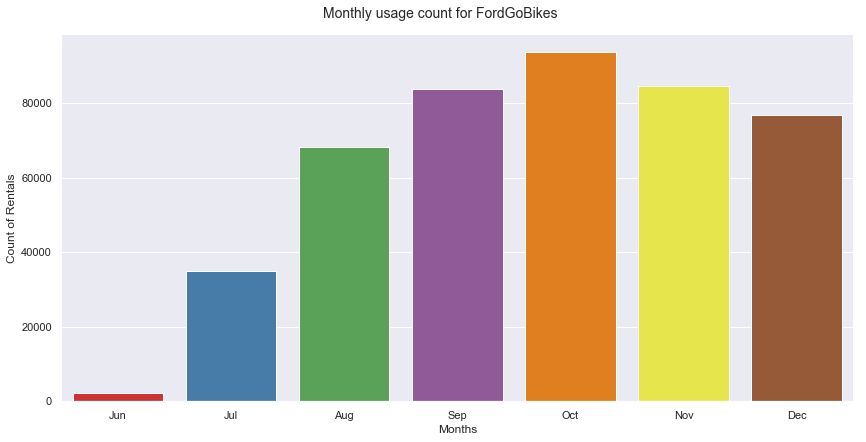

In [54]:
#Count of bike rentals from June to Dec, 2017
sns.set(font_scale=1)
months = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
g = sns.catplot(data=df_bike, x='start_month', kind='count', palette="Set1", order=months, height=6, aspect=2)

g.set_axis_labels("Months", "Count of Rentals")
g.fig.suptitle('Monthly usage count for FordGoBikes', y=1.02, fontsize=14);

October has the highest rental rate followed by November; Bike rentals are not run during the winter season for obvious reasons, but it is interesting to see that July and August did not have a staggering count in comparison to October and November.

In [55]:
new_df = df_bike.groupby('member_age_groups').agg({'bike_id':'count'}) 
#aggregating the groups by bike id so we can graph the data
print(new_df.head())

                   bike_id
member_age_groups         
10 - 20               4242
20 - 30             141469
30 - 40             169558
40 - 50              82252
50 - 60              39323


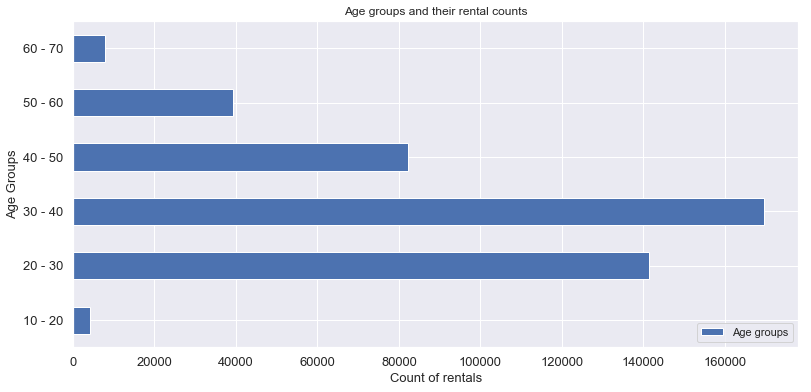

In [56]:
plotG = new_df.plot.barh(fontsize = 13)

#title and axis labelling
plotG.set(title = 'Age groups and their rental counts')
plotG.set_xlabel('Count of rentals', fontsize = '13')
plotG.set_ylabel('Age Groups',  fontsize = '13')

pltG_label= ['Age groups']
plt.legend(pltG_label, loc='lower right')

#adjusting plot size
plotG.figure.set_size_inches(13, 6)

plt.show()

Ages 30-40 have the highest count of age groups that are active and rent the bikes, followed by the 20-30 year olds. Interesting to see that the teenagers are of the lowest group, lower than the 60-70 group too.

In [57]:
df_bike.duration_min.describe()

count    444746.000000
mean         11.068367
std           7.711593
min           1.016667
25%           6.050000
50%           9.200000
75%          13.783333
max          75.000000
Name: duration_min, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Variable of interest had extreme outliers that distorted the data, it had a maximum duration close to 24 hours! while the mean was only 11 minutes long. This dataset was cleaned and removed with help of percentiles that accurately identified majority of data. Other interesting points noted were of age groups, it seems that the younger age groups are less active than the older. No transformation was needed however it was an interesting insight. Also, it appears that the time of the day that rentals are most taken are inlined with work times, and fall on weekdays. This information aligns with older age groups being the ones using this service. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The birth years for some of the candidates were unrealistic, such as the members who were above 90 years of age. However, this outlier issue has been rectified by the use of percentiles and dropping this information. Dropping outliers provides an accurate depiction of dataset.

## Bivariate Exploration

> We will be conducting pairwise explorations for the variables presented above, this process will help narrow our search and answer necessary questions

Briefly summarizing the correlations for the numerical datasets

In [58]:
numeric_vars = ['rider_age', 'duration_min','start_hour'] #numeric data of interest
category_vars = ['member_age_groups', 'start_month', 'start_day']

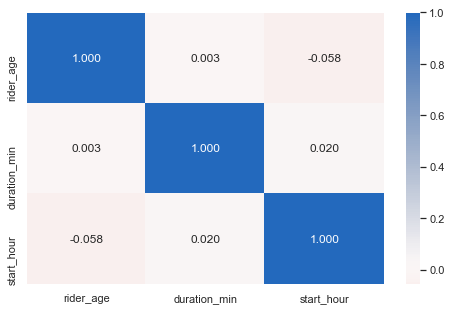

In [60]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the graph above, there seems to be no correlation between the numerical variables of interest; now we need to check if the numerical variables might be of correlation with the category variables

<Figure size 720x576 with 0 Axes>

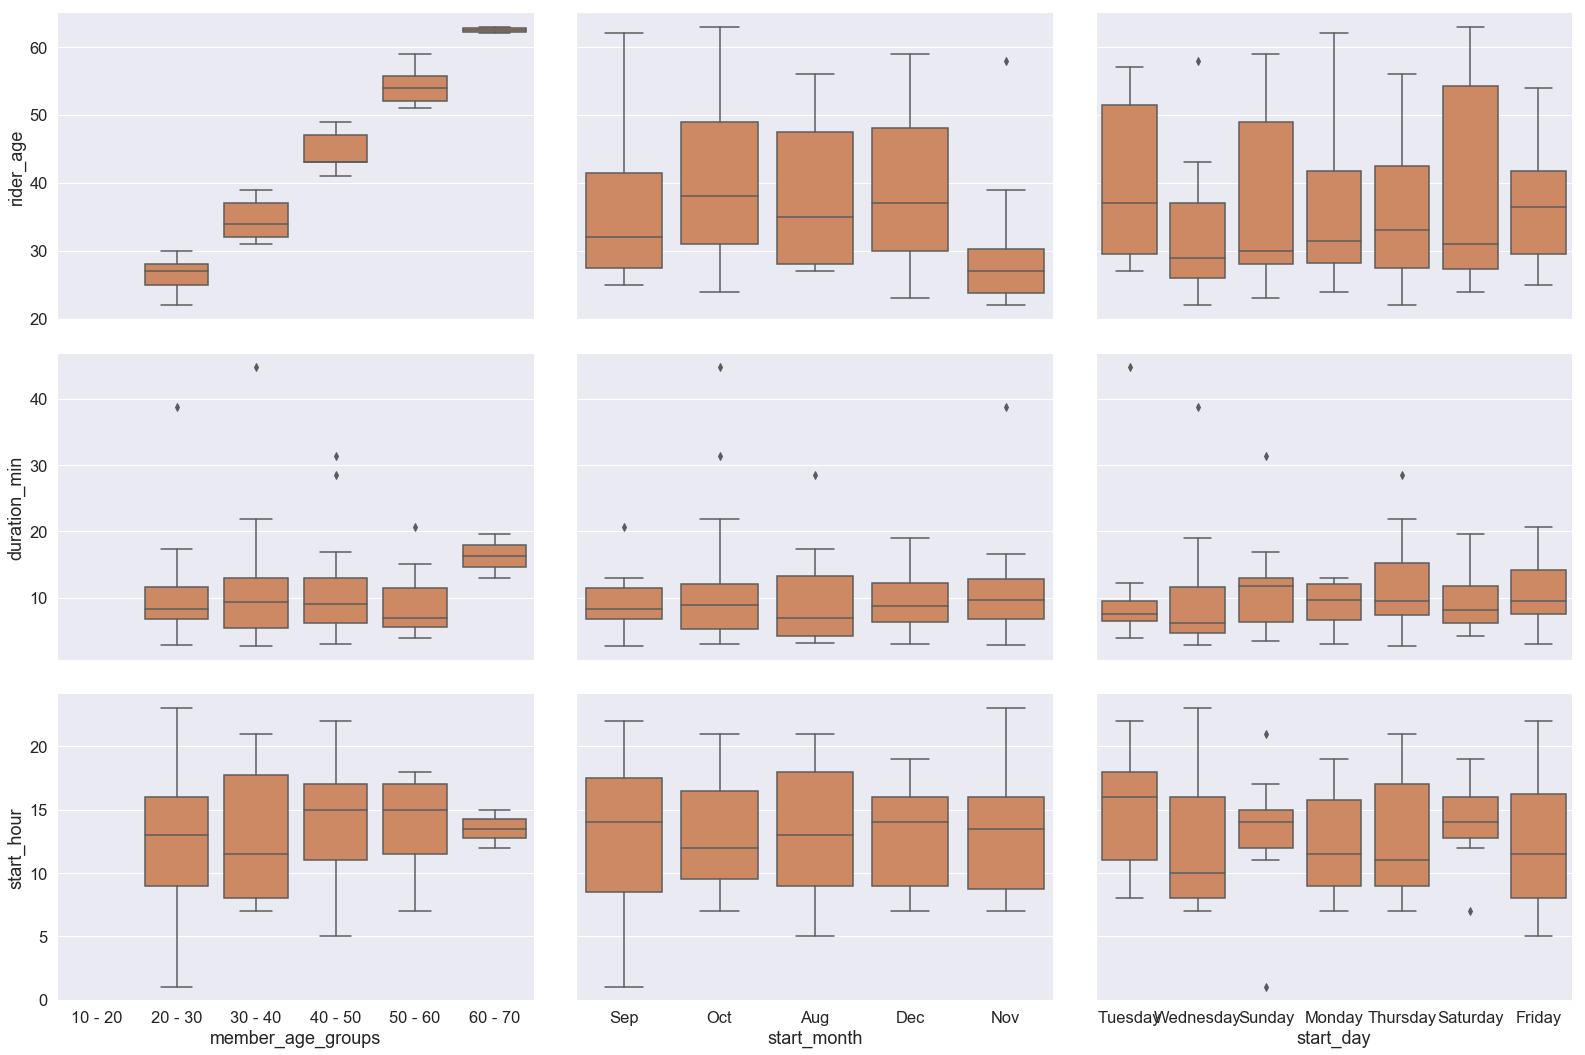

In [62]:
samples = np.random.choice(df_bike.shape[0], 100, replace = False)
data_samp = df_bike.loc[samples,:]



def boxplt(x, y, **kwargs):
    default_color = sns.color_palette()[1]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 8])
sns.set(font_scale=1.5)
g = sns.PairGrid(data = data_samp, y_vars = ['rider_age', 'duration_min', 'start_hour'], x_vars = category_vars,
                height = 5, aspect = 1.5)
g.map(boxplt)
plt.show();

From the pairwise comparison above using the boxplots, we can notice couple relationships: <br><br>
**start_day**
> - Mondays are the most verstalise with age ranges, followed by saturday<br>
> - Sundays appear to have the greatest duration of bike rentals, data is what we may expect for a weekend <br>
> - Start hours of rentals are very versatile with the days of the week, but weekends are generally later started than weekdays. Strange how Thursdays have a narrow starting time. <br>

**start_month**
> - November has the most diverse age group, which makes sense as November is the second busiest of the months and more rentals are being used<br>
> - Although November is not the busiest it does have the greatest duration of rentals, this can indicate to us that diversified age groups and duration have a certain correlation<br>
> - No correlation or patterns to be found between months of rental and start of bike rental<br>


**Member_age_groups**
> - age groups of 10-20 and 60-70 are very minimal that plots for 10-20 are not even visible <br>
> - Interestingly, it appears that age groups 60-70 rent the bike for the longest time, compared to the other groups<br>


Introducing other categorical variables that can pertain to our question

In [63]:
category_vars1= ['user_type', 'member_gender'] 
#category type interest with variables we previously utilized; split categories so the plot can be visualized better

<Figure size 720x576 with 0 Axes>

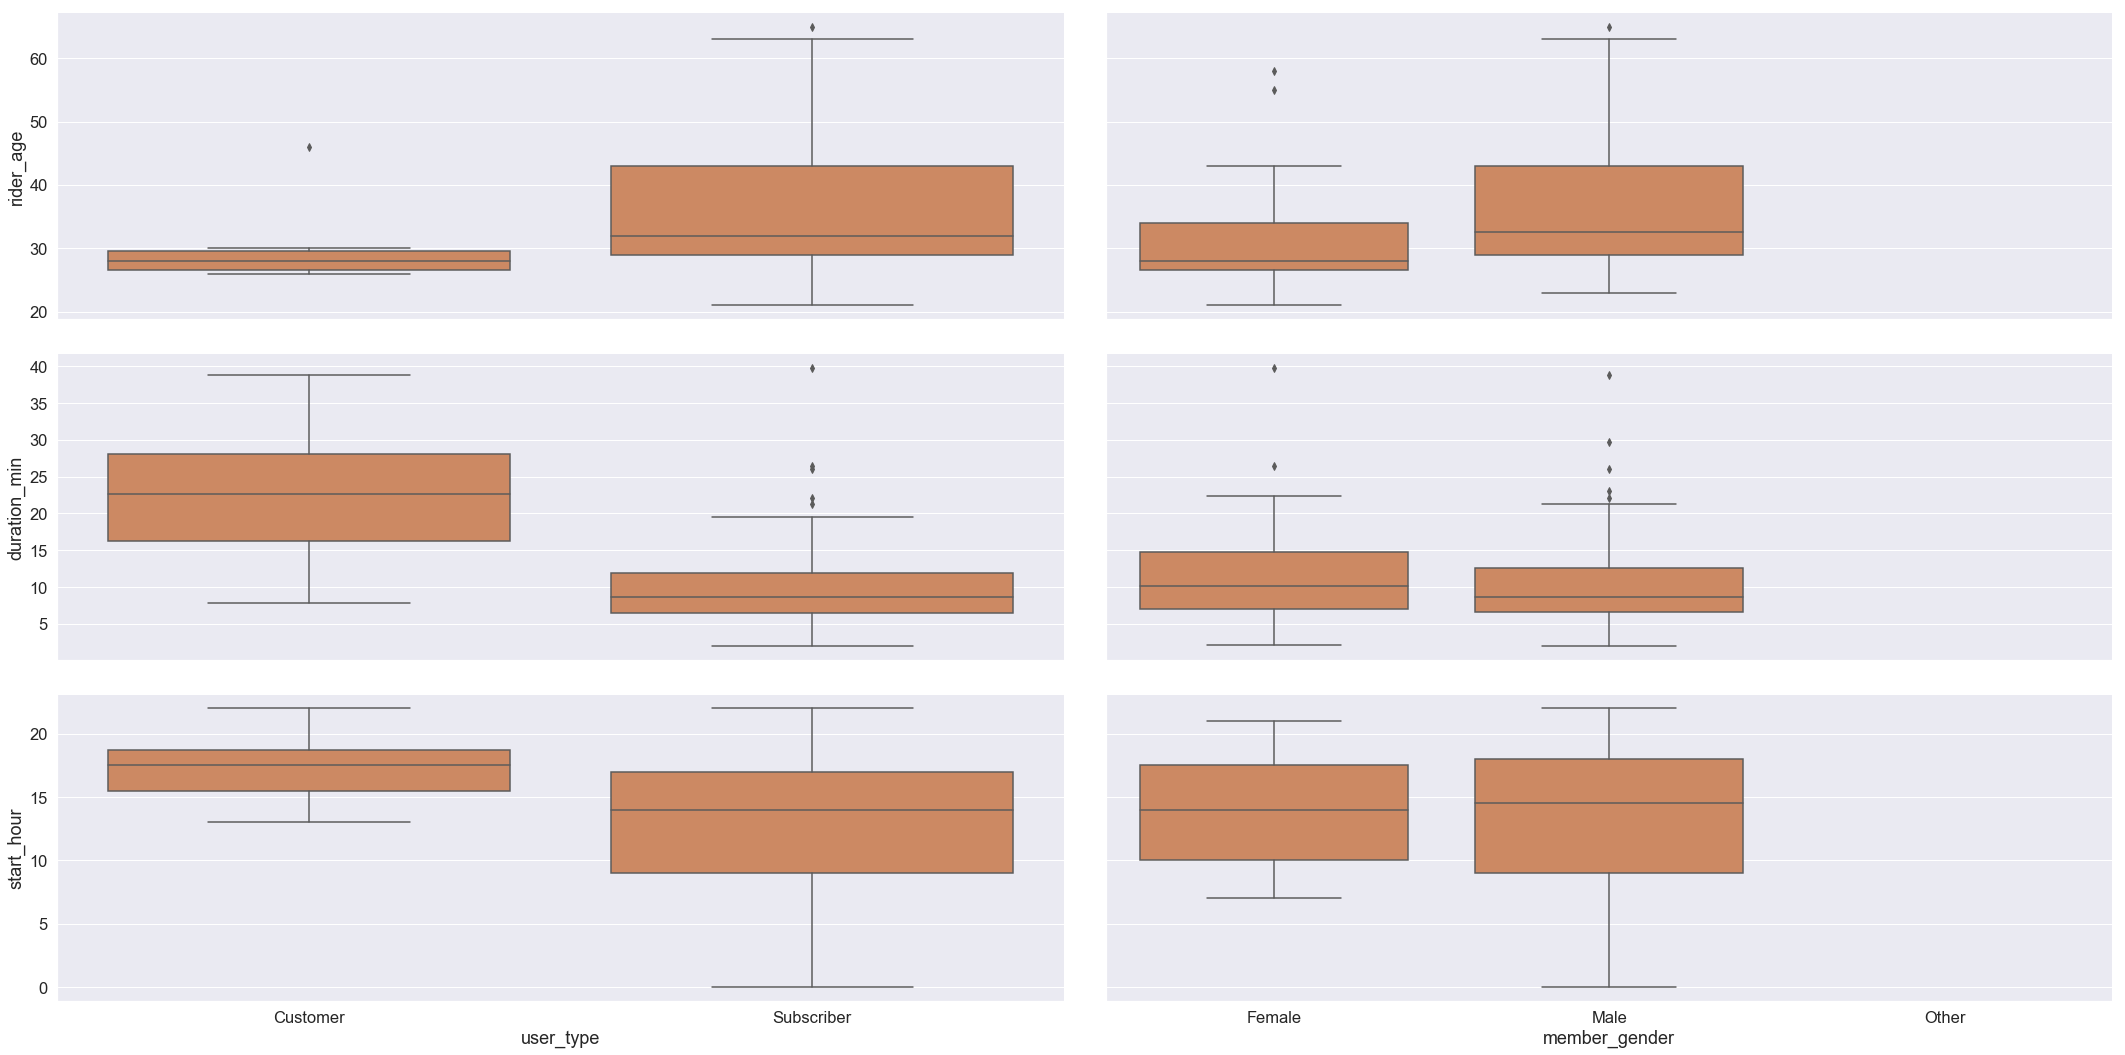

In [65]:
samples = np.random.choice(df_bike.shape[0], 100, replace = False)
data_samp = df_bike.loc[samples,:]

def boxplt(x, y, **kwargs):
    default_color = sns.color_palette()[1]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 8])
g = sns.PairGrid(data = data_samp, y_vars = ['rider_age', 'duration_min', 'start_hour'], x_vars = category_vars1,
                height = 5, aspect = 3)
g.map(boxplt)
plt.show();

From the pairwise comparison above using the boxplots, we can notice couple relationships: <br><br>
**User_type**
> - Subscribers are older in age, while customers are tentatively younger but some are also older;<br>
> - Customers have rented the bikes for a longer period, while subscribers not as much; <br>
> - Customers are renting the bikes at a later point during day while subscribers have a broader range. This may be because subscribers may use the ride for commuting and are regular in usage. Which can also explain lower duration time. <br>

**Member_gender**
> - Gender 'other' is not impacting the datasets as much, due to lower count<br>
> - Females are starting bike rentals at an earlier time and are using the rentals for longer durations<br>
> - Age factors are much similar between both genders, where some outliers exist but most settle between 25-40<br>

Lets use the variable of interest to figure out which group of bikers have the longer rental duration

Text(0.5, 0, 'Duration in mins')

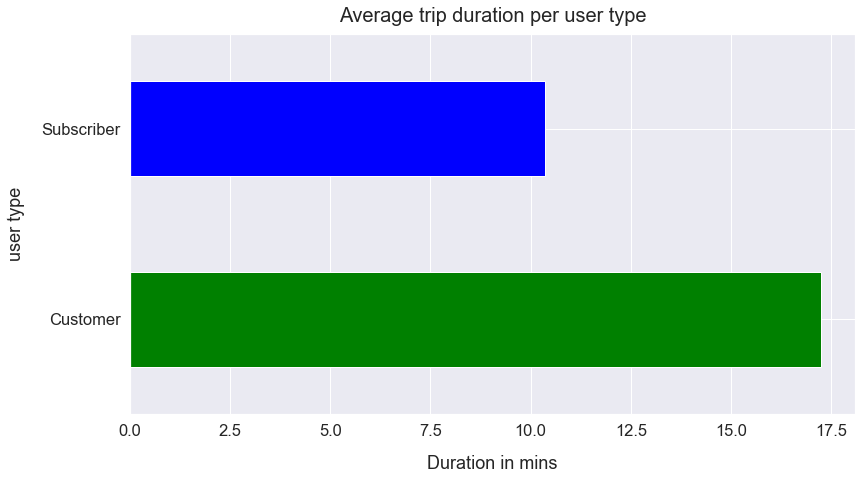

In [66]:
#plottingg user_type against duration 
new_color=['green', 'blue']
ax = df_bike.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))

ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('Duration in mins', labelpad=16)


Customers are tending to rent the bike rentals for a longer time, may be because they rent for leisure rather than commuting like the subscribers could be doing. We will do the same assessment for gender category

Text(0.5, 0, 'Duration in mins')

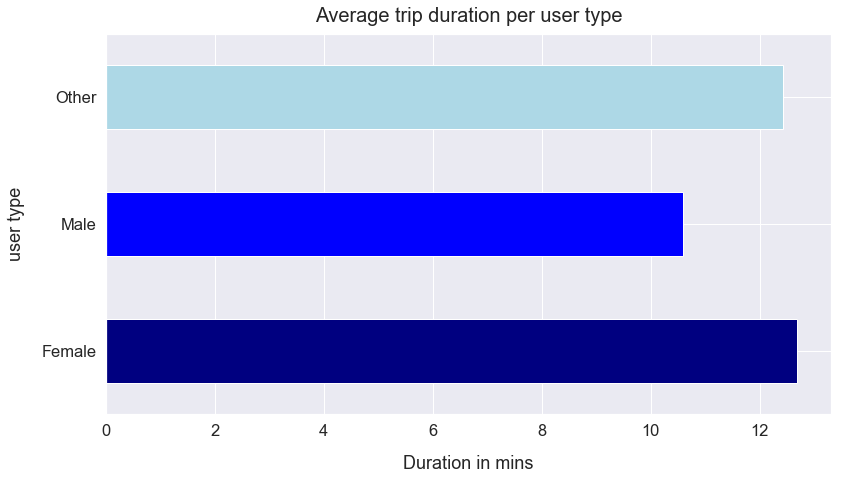

In [67]:
#plottingg user_type against duration 
new_color=['navy', 'blue', 'lightblue']
ax = df_bike.groupby('member_gender')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))

ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('Duration in mins', labelpad=16)


In [68]:
print(df_bike.shape); df_bike.member_gender.value_counts()

(444746, 21)


Male      342173
Female     96447
Other       6126
Name: member_gender, dtype: int64

Females are renting the bikes for longer duration, followed by gender 'other'. However 'other' category only consists of 6126 dataset out of the total 444,746 rows.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> With additive variables, our question is closer to completion. Customer and Subscriber relationships have shown us that the subscribers had a particular time that was mostly rented out, which are the business hours of 8am-5pm, while the customers preferred later during the day. The relationships are suggesting that most of the clients for FordGoBike rentals have been using it for daily commute to work or elsewhere, as the durations are small during weekdays but larger during the weekends. Peak season appears to be in November time for longer rentals, as more age groups are tending to the riding bikes. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to see that subscribers are older in age ranges compared to the customers, and it is also intriguing that the older age groups of 60-70 had the longest duration of rentals. This was not expected as one may expect the younger ages to be more active.

## Multivariate Exploration

> In this section we will explore all the variables mentioned above and try to identify any patterns or features of interest that can answer our question

We will start by exploring the user_type, duration_time, and member_gender

<Figure size 720x360 with 0 Axes>

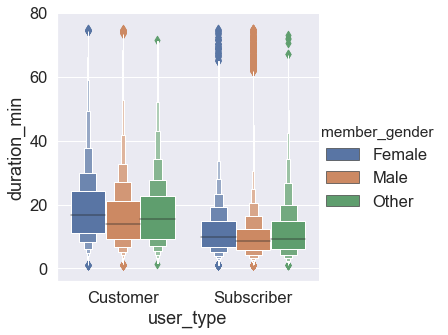

In [69]:
plt.figure(figsize = [10, 5])

g = sns.catplot(data=df_bike, x='user_type', y="duration_min", hue="member_gender", kind="boxen")
#g = sns.countplot(data=df_bike, x="user_type", y='duration_min',hue="member_gender", order=df_bike.user_type.value_counts().index)


This plot better summarizes data from previous section, where females tend to have longer duration of rentals followed by gender group 'other' and then males. Customers tend to rent the bike for longer periods in comparison to the subscribers. Lets see how these variables can be interpreted with months data.

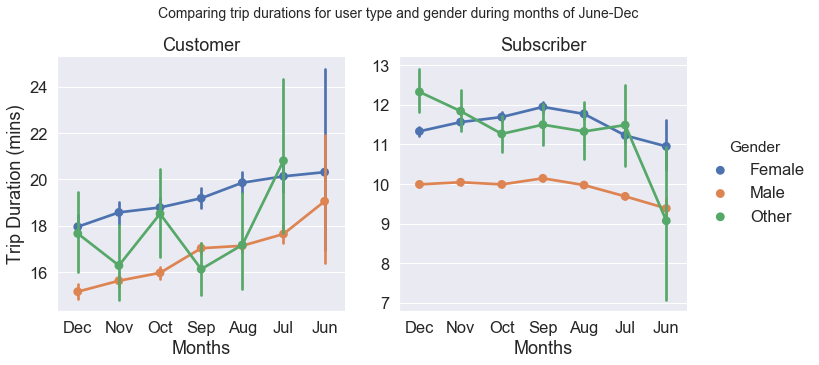

In [70]:
#comparing duration information with user_type, member_gender, and start_month
months = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
g = sns.catplot(data=df_bike, x='start_month', y='duration_min',col="user_type", hue="member_gender", kind='point', orders=months,sharey = False)


g.set_axis_labels("Months", "Trip Duration (mins)")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Comparing trip durations for user type and gender during months of June-Dec', y=1.03, fontsize=14);

It appears that the month of June had the longest duration of rentals for customers, although for subscribers the months of december had the highest rental. Females still shows to be consistent with the duration time. This maybe because customers ride for leisure and during the months of June is when the weather is usally better, and for subscribers Decemeber is the last month of activity prior to taking other modes of transportation for commuting. Day of the week will be the next mode of comparison between the categorical variables

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the features were not easily distinguishable, but from further plotting and analysis certain patterns could be made of. In this investigation, the age groups along with the durations have been the most fascinating as both of which were not anticipated. The graphs of customer and subscriber increased the strength of my interest, as it funneled my question to an actual answer, which is that the longest duration of rentals are not by subscribers but by customers who rent the longest in June and evening. Whereas the opposite of subsribers commuting to work has been discovered when analyzing the time of day of rentals.

### Were there any interesting or surprising interactions between features?

> There were certain features that were of surprise, especially the gender 'other' whom seem to have the longest duration of bike rentals but have the smallest overall count in data. This was suprising altogether as even though it was a small count, it made an impact for our variable of interest, duration.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!